In [ ]:
#VacuumCleanerAgent
class VacuumCleanerAgent:
    def __init__(self, environment):
        self.environment = environment
        self.position = (0, 0)

    def clean(self):
        rows = len(self.environment)
        cols = len(self.environment[0])
        top, bottom, left, right = 0, rows - 1, 0, cols - 1

        while top <= bottom and left <= right:
            # Traverse from left to right
            for col in range(left, right + 1):
                self.position = (top, col)
                print(f"Moving to position: {self.position}")
                self.clean_spot(top, col)
            top += 1

            # Traverse from top to bottom
            for row in range(top, bottom + 1):
                self.position = (row, right)
                print(f"Moving to position: {self.position}")
                self.clean_spot(row, right)
            right -= 1

            # Traverse from right to left
            if top <= bottom:
                for col in range(right, left - 1, -1):
                    self.position = (bottom, col)
                    print(f"Moving to position: {self.position}")
                    self.clean_spot(bottom, col)
                bottom -= 1

            # Traverse from bottom to top
            if left <= right:
                for row in range(bottom, top - 1, -1):
                    self.position = (row, left)
                    print(f"Moving to position: {self.position}")
                    self.clean_spot(row, left)
                left += 1

        print("Cleaning complete. Environment is clean now!")
        self.display_environment()

    def clean_spot(self, row, col):
        if self.environment[row][col] == 1:
            print("Dirty spot found. Cleaning...")
            self.environment[row][col] = 0
            print("Spot cleaned.")
        else:
            print("Spot is already clean.")

    def display_environment(self):
        
        print("\nCurrent state of the environment:")
        for row in self.environment:
            print(row)


def get_environment_input():
    rows = int(input("Enter the number of rows in the environment: "))
    cols = int(input("Enter the number of columns in the environment: "))
    environment = []
    for i in range(rows):
        row = list(map(int, input(f"Enter the values for row {i + 1} (space-separated, 0 = clean, 1 = dirty): ").split()))
        environment.append(row)
    return environment


# Main Program
environment = get_environment_input()
vacuum = VacuumCleanerAgent(environment)
vacuum.clean()


In [ ]:
#DFS
def dfs(graph, visited, vertex):
    print(f"Visiting vertex: {vertex}")
    visited[vertex] = True

    for neighbor, is_connected in enumerate(graph[vertex]):
        if is_connected and not visited[neighbor]:
            dfs(graph, visited, neighbor)

def main():
    # Input graph as adjacency matrix
    n = int(input("Enter the number of vertices: "))
    print("Enter the adjacency matrix (rows of 1s and 0s):")
    graph = [list(map(int, input().split())) for _ in range(n)]

    # Initialize visited list
    visited = [False] * n

    # Perform DFS starting from vertex 0
    start_vertex = int(input("Enter the starting vertex (0-indexed): "))
    print("\nDFS Traversal:")
    dfs(graph, visited, start_vertex)

if __name__ == "__main__":
    main()


In [ ]:
#BFS
from collections import deque

def bfs(graph, start_vertex):
    n = len(graph)
    visited = [False] * n
    queue = deque([start_vertex])
    visited[start_vertex] = True

    print("BFS Traversal:")
    while queue:
        vertex = queue.popleft()
        print(f"Visiting vertex: {vertex}")

        for neighbor, is_connected in enumerate(graph[vertex]):
            if is_connected and not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True

def main():
    # Input graph as adjacency matrix
    n = int(input("Enter the number of vertices: "))
    print("Enter the adjacency matrix (rows of 1s and 0s):")
    graph = [list(map(int, input().split())) for _ in range(n)]

    # Perform BFS starting from a given vertex
    start_vertex = int(input("Enter the starting vertex (0-indexed): "))
    bfs(graph, start_vertex)

if __name__ == "__main__":
    main()


In [ ]:
#UCS
import heapq

class Graph:
    def __init__(self, adjacency_matrix):
        self.graph = adjacency_matrix
        self.n = len(adjacency_matrix)

    def uniform_cost_search(self, start, goal):
        pq = []  # Priority queue to store (cost, node, path)
        heapq.heappush(pq, (0, start, [start]))
        visited = {}  # Dictionary to store the minimum cost to each node

        while pq:
            current_cost, node, path = heapq.heappop(pq)

            # Skip if we've already found a cheaper way to this node
            if node in visited and visited[node] <= current_cost:
                continue

            visited[node] = current_cost

            # Check if we've reached the goal
            if node == goal:
                print(f"\nPath to {goal} with total cost {current_cost}: {' -> '.join(map(str, path))}")
                return path

            # Explore neighbors
            for neighbor in range(self.n):
                if self.graph[node][neighbor] > 0:  # There's an edge with a positive weight
                    new_cost = current_cost + self.graph[node][neighbor]  # Use the actual edge cost
                    heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

        print(f"\nNode {goal} not found in the graph.")
        return None

def main():
    n = int(input("Enter the number of nodes: "))
    print("Enter the adjacency matrix (space-separated numbers, use 0 for no edge):")
    adjacency_matrix = []
    for _ in range(n):
        row = list(map(int, input().split()))
        adjacency_matrix.append(row)

    g = Graph(adjacency_matrix)

    start_node = int(input("Enter the starting node for the search: "))
    goal_node = int(input("Enter the goal node to search for: "))
    print(f"\nUniform Cost Search starting from node {start_node} to find node {goal_node}:")
    g.uniform_cost_search(start_node, goal_node)

if __name__ == "__main__":
    main()


In [ ]:
#GBFS
import heapq

def greedy_best_first_search(graph, start, goal, heuristic):
    # Priority queue (min-heap)
    open_list = []
    heapq.heappush(open_list, (heuristic[start], start))

    # Visited set to track explored nodes
    visited = set()

    print("Path Traversal:")
    while open_list:
        # Select the node with the smallest heuristic value
        _, current = heapq.heappop(open_list)

        print(f"Visiting node: {current}")

        if current == goal:
            print("Goal reached!")
            return

        if current in visited:
            continue

        visited.add(current)

        # Explore neighbors
        for neighbor, cost in enumerate(graph[current]):
            if cost > 0 and neighbor not in visited:
                heapq.heappush(open_list, (heuristic[neighbor], neighbor))

    print("Goal not reachable from the start node.")

def main():
    # Input graph as adjacency matrix
    n = int(input("Enter the number of nodes: "))
    print("Enter the adjacency matrix (rows of 1s and 0s):")
    graph = [list(map(int, input().split())) for _ in range(n)]

    print("Enter the heuristic values for each node:")
    heuristic = list(map(int, input().split()))

    start = int(input("Enter the starting node (0-indexed): "))
    goal = int(input("Enter the goal node (0-indexed): "))

    greedy_best_first_search(graph, start, goal, heuristic)

if __name__ == "__main__":
    main()


In [ ]:
#Astar
import heapq

class Graph:
    def __init__(self, adjacency_matrix):
        self.graph = adjacency_matrix
        self.n = len(adjacency_matrix)

    def a_star_search(self, start, goal, heuristic):
        pq = []  # Priority queue (min-heap)
        heapq.heappush(pq, (heuristic[start], 0, start, [start]))  # (f(n), g(n), node, path)
        g_costs = {start: 0}  # Dictionary to store the g(n) cost

        while pq:
            f_n, g_n, node, path = heapq.heappop(pq)

            # If goal is reached, return the path
            if node == goal:
                print(f"\nPath to {goal} using A* Search: {' -> '.join(map(str, path))}")
                print(f"Total cost: {g_n}")
                return path

            # Explore neighbors
            for neighbor in range(self.n):
                if self.graph[node][neighbor] > 0:  # There's an edge (positive weight)
                    edge_cost = self.graph[node][neighbor]
                    new_g_n = g_n + edge_cost  # g(n) for the neighbor
                    f_n = new_g_n + heuristic[neighbor]  # f(n) = g(n) + h(n)

                    if neighbor not in g_costs or new_g_n < g_costs[neighbor]:
                        g_costs[neighbor] = new_g_n
                        heapq.heappush(pq, (f_n, new_g_n, neighbor, path + [neighbor]))

        print(f"\nNode {goal} not found in the graph.")
        return None


def main():
    n = int(input("Enter the number of nodes: "))
    print("Enter the adjacency matrix (space-separated numbers, use 0 for no edge):")
    adjacency_matrix = []
    for _ in range(n):
        row = list(map(int, input().split()))
        adjacency_matrix.append(row)

    g = Graph(adjacency_matrix)

    start_node = int(input("Enter the starting node for the search: "))
    goal_node = int(input("Enter the goal node to search for: "))

    # Input heuristic values for each node
    print("Enter the heuristic values for each node:")
    heuristic = {}
    for node in range(n):
        heuristic[node] = int(input(f"Heuristic for node {node}: "))

    print(f"\nA* Search starting from node {start_node} to find node {goal_node}:")
    g.a_star_search(start_node, goal_node, heuristic)


if __name__ == "__main__":
    main()


In [ ]:
#IDLS
class Graph:
    def __init__(self, adjacency_matrix):
        self.graph = adjacency_matrix
        self.n = len(adjacency_matrix)  # Number of nodes

    def iterative_deepening_search(self, start, goal):
        depth = 0
        while True:
            print(f"\nSearching with depth limit {depth}:")
            found_path = self.depth_limited_search(start, goal, depth)
            if found_path:
                print(f"\nPath to {goal}: {' -> '.join(map(str, found_path))}")
                return found_path
            depth += 1

    def depth_limited_search(self, start, goal, max_depth):
        visited = set()
        path = []
        return self._dfs_helper(start, goal, visited, path, 0, max_depth)

    def _dfs_helper(self, node, goal, visited, path, current_depth, max_depth):
        if current_depth > max_depth:
            return None
        visited.add(node)
        path.append(node)
        if node == goal:
            return path.copy()
        for neighbor in range(self.n):
            if self.graph[node][neighbor] == 1 and neighbor not in visited:
                found_path = self._dfs_helper(
                    neighbor, goal, visited, path, current_depth + 1, max_depth
                )
                if found_path:
                    return found_path
        path.pop()
        return None


def main():
    n = int(input("Enter the number of nodes: "))
    print("Enter the adjacency matrix (0/1 format, space-separated):")
    adjacency_matrix = []
    for _ in range(n):
        row = list(map(int, input().split()))
        adjacency_matrix.append(row)

    g = Graph(adjacency_matrix)

    start_node = int(input("Enter the starting node for the search: "))
    goal_node = int(input("Enter the goal node to search for: "))

    print(f"Iterative Deepening Search starting from node {start_node} to find node {goal_node}:")
    g.iterative_deepening_search(start_node, goal_node)


if __name__ == "__main__":
    main()


In [ ]:
#Map Coloring
def is_safe(graph, color, vertex, c):
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and color[i] == c:
            return False
    return True


def graph_coloring_util(graph, m, color, vertex):
    if vertex == len(graph):
        return True

    for c in range(m):
        if is_safe(graph, color, vertex, c):
            color[vertex] = c
            if graph_coloring_util(graph, m, color, vertex + 1):
                return True
            color[vertex] = -1  # Backtrack if no solution is found for this color

    return False


def graph_coloring(graph, m):
    n = len(graph)
    color = [-1] * n  # Initialize color array with -1 (no color)

    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return None

    return color


def input_graph():
    n = int(input("Enter the number of vertices: "))
    graph = [[0] * n for _ in range(n)]
    e = int(input("Enter the number of edges: "))
    print("Enter the edges (u, v) where u and v are 0-indexed:")
    for _ in range(e):
        u, v = map(int, input().split())
        graph[u][v] = 1
        graph[v][u] = 1  # Since it's an undirected graph
    return graph, n


def main():
    graph, n = input_graph()
    m = int(input(f"Enter the number of colors to use (maximum {n}): "))
    color = graph_coloring(graph, m)

    if color:
        print("\nVertex coloring result:")
        for i in range(n):
            print(f"Vertex {i} -> Color {color[i]}")


if __name__ == "__main__":
    main()


In [ ]:
#CandidateElimination
import csv
# Read the training data from the CSV file
with open("findS.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)
# Initialize specific and general hypotheses
specific = data[1][:-1] # Assume first positive example as the specific hypothesis
general = [['?' for _ in specific] for _ in specific] # General hypothesis initialized
# Process each training example
for i in data:
    if i[-1] == "Yes":
 # For positive examples, generalize the specific hypothesis
        for j in range(len(specific)):
            if i[j] != specific[j]:
                specific[j] = "?" # Make specific hypothesis more general
                general[j][j] = "?" # Set general hypothesis to '?' where mismatch occurs
    else:
 # For negative examples, specialize the general hypothesis
        for j in range(len(specific)):
            if i[j] != specific[j]:
                general[j][j] = specific[j] # Set general hypothesis to specific value where mismatch occurs
            else:
                general[j][j] = "?" # Keep '?' where there's no mismatch
    print(f"\nStep {data.index(i)+1} of Candidate Elimination Algorithm")
    print(f"Specific Hypothesis: {specific}")
    print(f"General Hypothesis: {general}")
# Remove all redundant general hypotheses that contain only '?'
final_general = [g for g in general if '?' in g]
# Print the final results
print("\nFinal Specific Hypothesis:", specific)
print("\nFinal General Hypothesis:", final_general)

In [ ]:
#NaiveBayes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

data=pd.read_csv('diabetes.csv')
target='Outcome'
data=data.dropna()

x=data.drop(columns=[target])
y=data[target]

x=pd.get_dummies(x)
if y.dtype == 'object':
    le = LabelEncoder()
    y= le.fit_transform(y)

x=StandardScaler().fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

gnb=GaussianNB()

cv_score=cross_val_score(gnb,x,y,cv=5)
print(f'Cross validated scorre:{cv_score.mean()*100}')

gnb.fit(xtrain,ytrain)
y_pred=gnb.predict(xtest)

print("\nAccuacy score:",accuracy_score(ytest,y_pred))
print("\nclassification_report:\n",classification_report(ytest,y_pred))


In [ ]:
#BaysianNetwork
#Bayesian Belief Networks
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('heart.csv').dropna()
heartDisease['age'] = pd.cut(heartDisease['age'], bins=[29, 39, 49, 59, 69, 79, 89], labels=[30, 40, 50, 60, 70, 80])

model = BayesianNetwork([
 ('age', 'trestbps'),
 ('age', 'fbs'),
 ('sex', 'trestbps'),
 ('exang', 'trestbps'),
 ('trestbps', 'target'),
 ('fbs', 'target'),
 ('target', 'restecg'),
 ('target', 'thalach'),
 ('target', 'chol')
])

model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)
heartDisease_infer = VariableElimination(model)

q = heartDisease_infer.query(variables=['target'], evidence={'age': 30})
print(q)

print("\nProbability distribution for 'target':")
print(q.values)

q = heartDisease_infer.query(variables=['target'], evidence={'age': 70})
print(q)

print("\nProbability distribution for 'target':")
print(q.values)


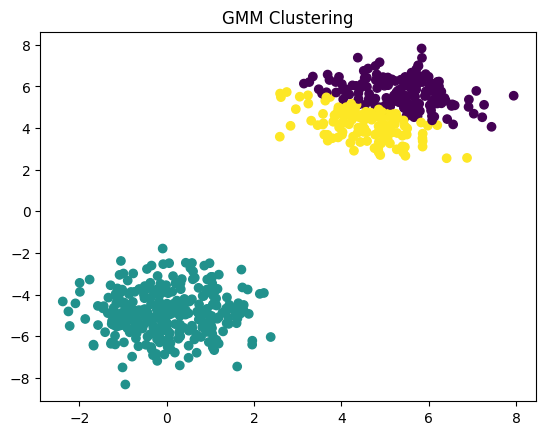

Means: 
[[ 5.28006239  5.63608035]
 [ 0.03206474 -4.87391174]
 [ 4.61011466  4.27380533]]
Covariances: 
[[[ 0.81640428 -0.10384155]
  [-0.10384155  0.54456773]]

 [[ 0.87736169  0.02682418]
  [ 0.02682418  1.15282042]]

 [[ 0.65933587 -0.21319981]
  [-0.21319981  0.62733681]]]
Weights: 
[0.28319383 0.5        0.21680617]


In [2]:
#EM
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = np.concatenate([np.random.randn(300, 2) + [5, 5], np.random.randn(300, 2) + [0, -5]])
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()


print(f"Means: \n{gmm.means_}")
print(f"Covariances: \n{gmm.covariances_}")
print(f"Weights: \n{gmm.weights_}")

In [1]:
#Backpropagation
import numpy as np

sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

w1, w2 = np.random.rand(2, 2), np.random.rand(2, 1)
b1, b2 = np.random.rand(1, 2), np.random.rand(1, 1)
lr, iter = 0.1, 10000

for _ in range(iter):
    h = sigmoid(X.dot(w1) + b1)
    o = sigmoid(h.dot(w2) + b2)
    e = y - o
    o_delta = e * sigmoid_derivative(o)
    h_delta = o_delta.dot(w2.T) * sigmoid_derivative(h)
    w1 += X.T.dot(h_delta) * lr
    w2 += h.T.dot(o_delta) * lr
    b1 += h_delta.sum(axis=0, keepdims=True) * lr
    b2 += o_delta.sum(axis=0, keepdims=True) * lr

print(o)

[[0.05428453]
 [0.9501429 ]
 [0.9501748 ]
 [0.05367494]]
